## Segundo Parcial
## Estadística Aplicada
Francisco Humberto Villegas Reyna Mat.1731722 Grupo043 

**Instrucciones**:Responda adecuadamente en una notebook lo que se pide.

El  Banco  de  la  Ilusión  (BIL)  ha  reconocido  la  necesidad  de  revisar  sus  políticas  de otorgamiento de préstamos. En  este  contexto,  sete  hadesignadopara  llevar  a  cabo  un  análisis  integral  de  la situación

La base de datos proporcionada contiene información relevante sobre cada préstamo. La variable "crédito_pagado" toma el valor de 1 si el cliente ha pagado completamente el préstamo y 0 si no lo ha hecho o aún no ha terminado de pagar. Además, se dispone deinformación sobre el tiempo en meses que lleva pagar completamente el préstamo, registrado  en  la  variable  "meses",  y  el  monto  del  préstamo  otorgado  en  euros, registrado en la variable "cantidad".

In [1]:
##Librerías Básicas
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## importar datos
banco= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

### 1.Análisis exploratorio

a)Cuantas variables y cuantas observaciones tienen la base

In [3]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   saldo_cuenta             1000 non-null   object
 1   meses                    1000 non-null   int64 
 2   historia_crediticia      1000 non-null   object
 3   uso                      1000 non-null   object
 4   cantidad                 1000 non-null   int64 
 5   saldo_cuenta_ahorro      817 non-null    object
 6   años_trabajando          1000 non-null   object
 7   tasa_de_interes          1000 non-null   int64 
 8   genero_estado_civil      1000 non-null   object
 9   aval                     52 non-null     object
 10  años_actual_domicilio    1000 non-null   int64 
 11  activos                  1000 non-null   object
 12  edad                     1000 non-null   int64 
 13  planes_de_pago           186 non-null    object
 14  casa                     1000 non-null   

Son 1000 filas y 19 variables

In [4]:
banco.isnull().sum()

saldo_cuenta                 0
meses                        0
historia_crediticia          0
uso                          0
cantidad                     0
saldo_cuenta_ahorro        183
años_trabajando              0
tasa_de_interes              0
genero_estado_civil          0
aval                       948
años_actual_domicilio        0
activos                      0
edad                         0
planes_de_pago             814
casa                         0
numero_creditos              0
situacion_laboral            0
dependientes_economicos      0
telefono                     0
extranjero                   0
credito_pagado               0
dtype: int64

b)Cuál es el monto promedio de los créditos otorgados por el banco

In [5]:
print('El monto promedio de los créditos otorgados por el banco es de $',banco.cantidad.mean().round(2))

El monto promedio de los créditos otorgados por el banco es de $ 3271.26


c)Cuáles  el  tiempo  promedio  que  se  tardaron  en  pagar  el  préstamo  los que pagaron el préstamo en su totalidad

In [6]:
Totalidad=banco.query('credito_pagado==1')
pendiente=banco.query('credito_pagado==0')

In [7]:
print('El tiempo promedio que se tardaron en pagar el préstamo los que pagaron el prestamo en su totalidad es de ',Totalidad.meses.mean().round(), 'meses.')

El tiempo promedio que se tardaron en pagar el préstamo los que pagaron el prestamo en su totalidad es de  19.0 meses.


d)Cuáles la tasa de interés promedio otorgada por el banco

In [8]:
print('EL interes promedio que otorga el banco en sus prestamos es de ',banco.tasa_de_interes.mean(),'%.')

EL interes promedio que otorga el banco en sus prestamos es de  2.973 %.


e)Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron

In [9]:
print('El monto promedio de los créditos que ya fueron pagados son de $', Totalidad.cantidad.mean().round(2), 'y su la tasa de interes promedio es de ',Totalidad.tasa_de_interes.mean().round(2),'%.')

El monto promedio de los créditos que ya fueron pagados son de $ 2985.46 y su la tasa de interes promedio es de  2.92 %.


f)Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado 

In [10]:
print('El monto promedio de los créditos que que aun no han pagado fueron pagados son de $',pendiente.cantidad.mean().round(2))

El monto promedio de los créditos que que aun no han pagado fueron pagados son de $ 3938.13


### 2.Estime un modelo de Kaplan-meier 

In [11]:
from lifelines import KaplanMeierFitter

In [12]:
bancosk=KaplanMeierFitter().fit(banco['meses'], banco['credito_pagado'])

In [13]:
bancosk.survival_function_

,KM_estimate
timeline,
0.0,1.000000
4.0,0.994000
5.0,0.993000
6.0,0.927000
7.0,0.921951
8.0,0.915892
9.0,0.880510
10.0,0.854824
11.0,0.845544


In [17]:
bancosk.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
4.0,0.986694,0.997300
5.0,0.985373,0.996657
6.0,0.909053,0.941520
7.0,0.903516,0.936987
8.0,0.896898,0.931522
9.0,0.858710,0.899146
10.0,0.831324,0.875299
11.0,0.821490,0.866623
12.0,0.682005,0.738791


Text(0, 0.5, '$\\hat{s(t)}$')

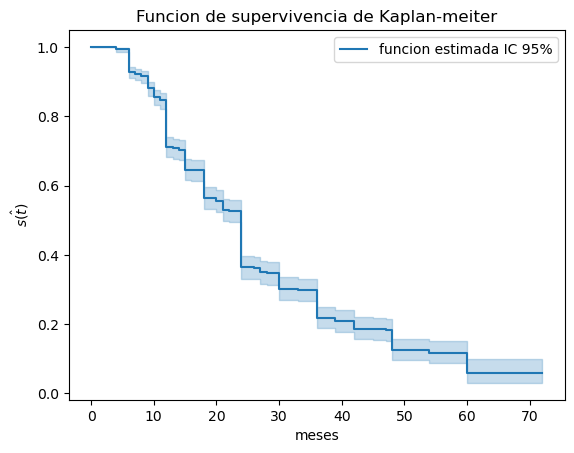

In [15]:
bancosk.plot_survival_function(label='funcion estimada IC 95%');
plt.title('Funcion de supervivencia de Kaplan-meiter');
plt.xlabel('meses')
plt.ylabel('$\hat{s(t)}$')

a)cuál es la mediana del tiempo y que significa

In [16]:
bancosk.median_survival_time_

24.0

En 24 meses , es decir, 2 años es el tiempo en el cual la gente que tiene un crédito en el banco lleva pagando o pago dicho cédito otorgado.

b)es mayor/menor que el tiempo promedio del inciso 1c

In [17]:
if (bancosk.median_survival_time_>Totalidad.meses.mean().round()):
    print('Es mayor que el tiempo promedio del inciso 1c')
else:
        print('Es menor que el tiempo promedio del inciso 1c ')

Es mayor que el tiempo promedio del inciso 1c


### 3.Determine si el riesgo de que el préstamo se pague en su totalidad esconstante,creciente, decreciente, o tipo log-normal respecto al tiempo

In [18]:
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [19]:
#modelo weibull
bancoweibull=WeibullFitter().fit(banco['meses'],banco['credito_pagado'])

Text(0, 0.5, '$h(t)$')

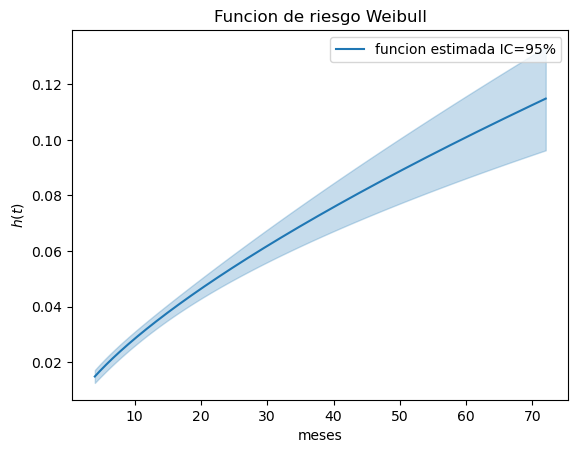

In [20]:
bancoweibull.plot_hazard(label='funcion estimada IC=95%')
plt.title('Funcion de riesgo Weibull')
plt.xlabel('meses')
plt.ylabel('$h(t)$')

Se puede observar que el riesgo es creciente dado que y>1, que significa que la tendencia es ascendente que una persona no va a terminar a pagar su crédito entre más pase los meses.

In [21]:
bancologn=LogNormalFitter().fit(banco['meses'],banco['credito_pagado'])

Text(0, 0.5, '$h(t)$')

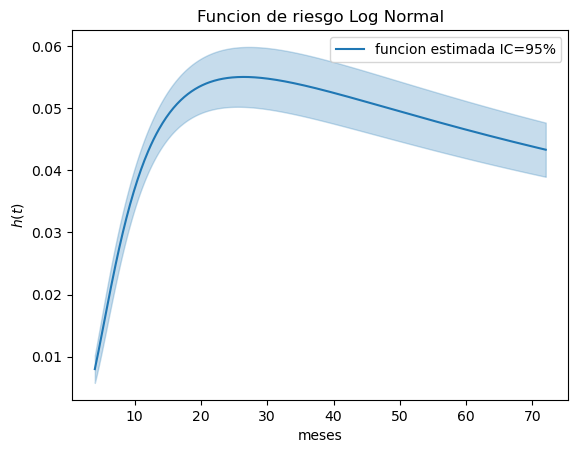

In [22]:
bancologn.plot_hazard(label='funcion estimada IC=95%')
plt.title('Funcion de riesgo Log Normal')
plt.xlabel('meses')
plt.ylabel('$h(t)$')

Por medio del método Log Normal nos refleja que el riesgo que una persona termine de pagar su crédito es mayor durante el mes 20 y el mes 30.

### 4.Estimar un modelo de Cox para ver qué factores influyen sobre el riesgo de que el préstamo se pague en su totalidad

In [23]:
from lifelines import CoxPHFitter
import seaborn as sns

In [24]:
bancox=pd.DataFrame(banco)
bancox=bancox[['meses','cantidad','tasa_de_interes','edad','numero_creditos','extranjero','dependientes_economicos','credito_pagado']]
bancox.head()

,meses,cantidad,tasa_de_interes,edad,numero_creditos,extranjero,dependientes_economicos,credito_pagado
0,6,1169,4,67,2,1,1,1
1,48,5951,2,22,1,1,1,0
2,12,2096,2,49,1,1,2,1
3,42,7882,2,45,1,1,2,1
4,24,4870,3,53,2,1,2,0


In [25]:
bancocox=CoxPHFitter().fit(bancox,'meses','credito_pagado')
bancocox.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4042.59
         time fit was run = 2023-10-08 01:44:14 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
cantidad                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
tasa_de_interes          -0.41       0.67       0.04            -0.48            -0.33                 0.62                 0.72
edad                      0.02       1.02       0.00             0.01             0.02                 1.01                 1.02
numero_creditos           0.12       1.13       0.07            -0.01             0.26                 0.99                 1.29
extranjero               -1.19       0.31       0.18            -1.55            -0.83                 0.21                 0.44
dependientes_economicos  -0.00       1.00       0.11            -0.21             0.21                 0.81                 1.23

                          cmp to      z      p   -log2(p)
covariate                                                
cantidad                    0.00 -16.35 <0.005     197.14
tasa_de_interes             0.00 -11.10 <0.005      92.71
edad                        0.00   4.51 <0.005      17.24
numero_creditos             0.00   1.86   0.06       3.98
extranjero                  0.00  -6.45 <0.005      33.03
dependientes_economicos     0.00  -0.01   0.99       0.02
---
Concordance = 0.78
Partial AIC = 8097.19
log-likelihood ratio test = 453.58 on 6 df
-log2(p) of ll-ratio test = 312.53

$H:Bfin=0$

$Pvalue< alpha$


Las variables 'numero_creditos' y 'dependientes_economicos' no tienen efecto en el riesgo de la persona no termine de pagar su credito al Banco de la Ilusión.

**tasa_de_interes**

Rechazamos $H_0$

La variable 'tasa_de_interes' disminuye el riesgo que la persona a que se le otorgo el crédtio no termine de pagarlo. Entre más grande sea la casa de intereses disminuye un 33% el riesgo que la persona no termine de pagar el préstamo otrogado.

**edad**

Rechazamos $H_0$
La variable 'edad' aumenta el riesgo que la persona a que se le otorgo el crédtio no termine de pagarlo. Entre más pasa el tiempo aumenta un 2% el riesgo que la persona no termine de pagar el préstamo otrogado.

**extranjero**

Rechazamos $H_0$
La variable 'edad' dismunuye el riesgo que la persona a que se le otorgo el crédtio no termine de pagarlo. Si la persona es extranjera disminuye un 69% el riesgo que dicha  persona no termine de pagar el préstamo otrogado.



In [32]:
bancow=pd.DataFrame(banco)
bancow=bancow[['meses','cantidad','tasa_de_interes','edad','numero_creditos','credito_pagado']]
bancow.head()

,meses,cantidad,tasa_de_interes,edad,numero_creditos,credito_pagado
0,6,1169,4,67,2,1
1,48,5951,2,22,1,0
2,12,2096,2,49,1,1
3,42,7882,2,45,1,1
4,24,4870,3,53,2,0


In [27]:
bancocox.check_assumptions(bancox,p_value_threshold=0.05)

# H0 : SE VIOLA EL SUPUESTO DE RIESGO PROP CTE

# HA : NO SE VIOLA EL SUPUESTO DE RIESGO PROPORCIONAL CONSTANTE

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
         test_name = proportional_hazard_test

---
                              test_statistic      p  -log2(p)
cantidad                km             99.55 <0.005     75.47
                        rank           95.57 <0.005     72.57
dependientes_economicos km              3.92   0.05      4.39
                        rank            4.10   0.04      4.55
edad                    km              3.27   0.07      3.82
                        rank            3.70   0.05      4.20
extranjero              km              0.36   0.55      0.86
                        rank            0.59   0.44      1.17
numero_creditos         km              1.89   0.17      2.56
                        rank            3.81   0.05      4.29
tasa_de_interes         km             32.95 <0.005     26.66
                        rank           31.81 <0.005     25.81



1. Variable 'cantidad' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'cantidad' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'cantidad' using pd.cut, and then specify it in
`strata=['cantidad', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'tasa_de_interes' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 4), you can include `strata=['tasa_de_interes', ...]` in
the call in `.fit`. See documentation in link [E] below.

3. Variable 'edad' failed the non-proportional test: p-value is 0.0543.

   Advice 1: the functional form of the

[]

Este modelo de Cox no cumple el supuesto de riesgo proporcional constante, debemos de utilizar AFT "modelo de riesgo acelerado"

In [37]:
exp=ExponentialFitter().fit(bancox['meses'],bancox['credito_pagado'])
weibull = WeibullFitter().fit(bancox['meses'],bancox['credito_pagado'])
logn= LogNormalFitter().fit(bancox['meses'],bancox['credito_pagado'])

In [29]:
exp.AIC_.round(2),weibull.AIC_.round(2), logn.AIC_.round(2)

(6157.19, 5900.98, 5813.75)

El mejor modelo es el Log Normal, por tanto es el que utilizaremos para el AFT

In [30]:
from lifelines import LogNormalAFTFitter

In [31]:
lognaft = LogNormalAFTFitter().fit(bancox,'meses','credito_pagado')
lognaft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
   number of observations = 1000
number of events observed = 700
           log-likelihood = -2630.36
         time fit was run = 2023-10-08 02:29:40 UTC

---
                                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                       
mu_    cantidad                  0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
       dependientes_economicos  -0.06       0.94       0.05            -0.15             0.03                 0.86                 1.03
       edad                     -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
       extranjero                0.37       1.45       0.08             0.20             0.54                 1.23                 1.71
       numero_creditos          -0.03       0.97       0.03            -0.09             0.02                 0.91                 1.02
       tasa_de_interes           0.19       1.22       0.02             0.16             0.22                 1.18                 1.25
       Intercept                 1.88       6.53       0.12             1.64             2.11                 5.15                 8.28
sigma_ Intercept                -0.73       0.48       0.03            -0.78            -0.68                 0.46                 0.51

                                 cmp to      z      p   -log2(p)
param  covariate                                                
mu_    cantidad                    0.00  24.23 <0.005     428.48
       dependientes_economicos     0.00  -1.24   0.21       2.23
       edad                        0.00  -4.41 <0.005      16.53
       extranjero                  0.00   4.37 <0.005      16.32
       numero_creditos             0.00  -1.19   0.24       2.08
       tasa_de_interes             0.00  12.66 <0.005     119.57
       Intercept                   0.00  15.48 <0.005     177.04
sigma_ Intercept                   0.00 -26.79 <0.005     522.92
---
Concordance = 0.78
AIC = 5276.73
log-likelihood ratio test = 549.02 on 6 df
-log2(p) of ll-ratio test = 380.82

Las variables 'dependientes_economicos' y 'numero_creditos' no tienen efecto en el riesgo para la persona no termine de pagar el crédito otorgado.

Rechazamos $H_0$
La variable 'edad' dismuniye el riesgo que la persona a que se le otorgo el crédtio no termine de pagarlo. Entre más grande de edad sea la persona , disminuye un 1% el riesgo que la persona no termine de pagar el préstamo otrogado a comparacion de una persona joven.

Rechazamos $H_0$
La variable 'extranjero' aumenta el riesgo que la persona a que se le otorgo el crédtio no termine de pagarlo. Si la persona no tiene la nacionalidad mexicana  aumenta un 45% el riesgo que la persona no termine de pagar el préstamo otrogado a comparación de una persona nacida en méxico.

Rechazamos $H_0$
La variable 'tasa_de_interes' aumenta el riesgo que la persona a que se le otorgo el crédtio no termine de pagarlo. Entre mas alta sea la tasa de interes, aumenta un 22% el riesgo que la persona no termine de pagar el préstamo otorgado a comparacion del escenario que se otorgue un crédito con una tasa de interes mas baja.

In [41]:
banco

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sin_cuenta,12,pago_algun_credito,mobiliario,1736,menor_100,4_a_7,3,mujer_no_soltera,NaN,...,bienes_raices,31,NaN,propia,1,obrero,1,0,1,1
996,menor_a_cero,30,pago_algun_credito,coche_usado,3857,menor_100,1_a_4,4,hombre_divorciado,NaN,...,seguro_vida,40,NaN,propia,1,administrativo,1,1,1,1
997,sin_cuenta,12,pago_algun_credito,TV,804,menor_100,mas_de_7,4,hombre_soltero,NaN,...,otro_tipo,38,NaN,propia,1,gobierno,1,0,1,1
998,menor_a_cero,45,pago_algun_credito,TV,1845,menor_100,1_a_4,4,hombre_soltero,NaN,...,sin_activos,23,NaN,prestada,1,gobierno,1,1,1,0


Se debería dar más peso a la decisión de dar un crédito a una persona investigando la cantidad de créditos que tiene dicha persona ya sea en el mismo banco o en los demás que existe en el país y a su vez que tenga peso en relación con la tasa de interés, es decir entre más grande sea el número de créditos que tenga una persona, mayor debería ser la tasa de interés.
Se tiene que hacer una estrategia para otorgar créditos a personas jóvenes, debido que no tienen un historial crediticio, experiencia laboral e incluso trabajo, por lo cual se debería dar créditos con baja cantidad y con una considerable tasa de interés para fomentar la cultura del crédito a largo plazo se reduzca el tiempo que tarda de pagar el crédito otorgado. Si la persona no es nacida en Mexico se le debe otorgar el crédito con una tasa de interés alto para que el riesgo que no termine de pagar el crédito disminuya.
Las variables ‘uso’ y ‘teléfono’ no deberían tener una relevancia a la hora de asignar la cantidad o tasa de interés del crédito ya que no define si está en riesgo de no pagar dicho crédito.
La cantidad de dependientes económicos o el estado civil de igual forma no garantiza que si no tiene hijos o es soltero puede terminar de pagar el crédito, en cambio la profesión a la que dedica y los años trabajados deberían influenciar mas en la cantidad y tasa de interés otorgado. Debido a que entre mas tiempo de labor y mejor calidad de puesto de su profesión debe de disminuir el riego que no termine de pagar el crédito acordado a menor meses.
